# ETL Data Pipeline: Extract, Transform, Load

This notebook demonstrates a complete ETL workflow using a movies dataset from Kaggle:
- **Extract**: Load data using kagglehub
- **Transform**: Clean and process data through multiple steps
- **Load**: Save processed data in different formats

Each transformation step is visualized to show its impact on the dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import kagglehub


/Users/ekirimlioglu/Cursor/Rickg/DSE200-Day1/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EXTRACT: Load Data from Kaggle


In [2]:
# Extract: Download movies dataset using kagglehub
path = kagglehub.dataset_download("bharatnatrayn/movies-dataset-for-feature-extracion-prediction")
print("Path to dataset files:", path)

# Load the movies dataset
data_path = Path(path) / "movies.csv"
raw_df = pd.read_csv(data_path)

print(f"Dataset loaded: {raw_df.shape}")
print(f"Columns: {list(raw_df.columns)}")
print(f"Missing values: {raw_df.isnull().sum().sum()}")
raw_df.head()


Path to dataset files: /Users/ekirimlioglu/.cache/kagglehub/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction/versions/1
Dataset loaded: (9999, 9)
Columns: ['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES', 'RunTime', 'Gross']
Missing values: 16861


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


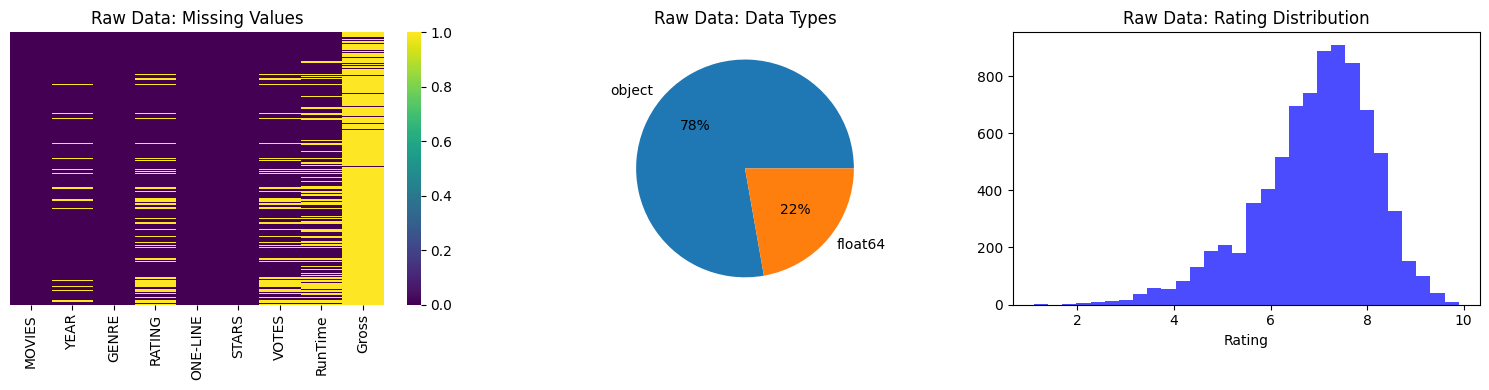

In [3]:
# Visualize raw data characteristics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Missing data pattern
sns.heatmap(raw_df.isnull(), ax=axes[0], cbar=True, yticklabels=False, cmap='viridis')
axes[0].set_title('Raw Data: Missing Values')

# Data types distribution
dtype_counts = raw_df.dtypes.value_counts()
axes[1].pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.0f%%')
axes[1].set_title('Raw Data: Data Types')

# Rating distribution
if 'RATING' in raw_df.columns:
    axes[2].hist(raw_df['RATING'].dropna(), bins=30, alpha=0.7, color='blue')
    axes[2].set_title('Raw Data: Rating Distribution')
    axes[2].set_xlabel('Rating')
else:
    axes[2].text(0.5, 0.5, 'No rating column found', ha='center', va='center')
    axes[2].set_title('Raw Data: Sample Distribution')

plt.tight_layout()
plt.show()


## TRANSFORM: Data Processing Pipeline

Clean and process the raw data through multiple transformation steps.


In [4]:
# Initialize transformation tracking
df = raw_df.copy()
transformations = []

def track_transformation(step_name, before_df, after_df):
    """Track how each transformation affects the dataset"""
    change = {
        'Step': step_name,
        'Rows': f"{len(before_df)} → {len(after_df)}",
        'Columns': f"{len(before_df.columns)} → {len(after_df.columns)}",
        'Missing': f"{before_df.isnull().sum().sum()} → {after_df.isnull().sum().sum()}",
        'Rows_After': len(after_df),
        'Cols_After': len(after_df.columns),
        'Missing_After': after_df.isnull().sum().sum()
    }
    transformations.append(change)
    print(f"{step_name}: {change['Rows']}, {change['Missing']} missing")

print("Starting transformation pipeline...")
print(f"Original data: {df.shape}, {df.isnull().sum().sum()} missing values")


Starting transformation pipeline...
Original data: (9999, 9), 16861 missing values


In [5]:
# Step 1: Clean column names and remove unnecessary columns
before_df = df.copy()

# Standardize column names
df.columns = df.columns.str.upper().str.strip()

# Remove rows with missing essential data (movies without names)
df = df.dropna(subset=['MOVIES'])

track_transformation('1. Clean names & remove missing movies', before_df, df)


1. Clean names & remove missing movies: 9999 → 9999, 16861 → 16861 missing


In [6]:
# Step 2: Further clean up missing values
before_df = df.copy()

# we may want a better clean up strategy which we will discuss in the future weeks
# for now drop gross column since it has too many missing values
df = df.drop(columns=['GROSS'])

# drop rows with missing values
df = df.dropna()

track_transformation('2. Handle missing values', before_df, df)

df.head()


2. Handle missing values: 9999 → 6779, 16861 → 0 missing


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RUNTIME
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0


In [7]:
# Step 3: Feature engineering
before_df = df.copy()

# Clean text fields - remove newlines and extra spaces
text_columns = ['ONE-LINE', 'GENRE', 'STARS']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'\n', ' ', regex=True)
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
        df[col] = df[col].str.strip()

# Parse YEAR field to handle ranges like (2021-) and (2010-2022)
if 'YEAR' in df.columns:
    # Extract start year from patterns like (2020-2022) or (2021-)
    # Regex: \((\d{4})
    # - \( matches literal opening parenthesis
    # - (\d{4}) is a capture group that matches exactly 4 digits
    # - The parentheses create a capture group that extract() returns
    df['YEAR_START'] = df['YEAR'].astype(str).str.extract(r'\((\d{4})', expand=False).astype(float)
    
    # Extract end year if it exists
    # Regex: (\d{4})\)
    # - (\d{4}) is a capture group that matches exactly 4 digits
    # - \) matches literal closing parenthesis
    # - Only the captured group (the 4 digits) is returned, not the parenthesis
    df['YEAR_END'] = df['YEAR'].astype(str).str.extract(r'(\d{4})\)', expand=False).astype(float)
    
    # For ongoing series (like 2021-), set end year to None
    # Regex: \d{4}–\s*\)
    # - \d{4} matches exactly 4 digits (not captured, just matched)
    # - – matches the dash character
    # - \s* matches zero or more whitespace characters
    # - \) matches literal closing parenthesis
    # - contains() returns True if pattern is found anywhere in string
    ongoing_mask = df['YEAR'].str.contains(r'\d{4}–\s*\)', na=False)
    df.loc[ongoing_mask, 'YEAR_END'] = None
    
    # Create decade from start year
    df['DECADE'] = (df['YEAR_START'] // 10 * 10).astype('Int64')

    # drop year column now that we have the start and end years
    df = df.drop(columns=['YEAR'])

# Parse GENRE field to extract all genres
if 'GENRE' in df.columns:
    # Split genres and clean them
    df['GENRES_LIST'] = df['GENRE'].str.split(',')
    df['GENRES_LIST'] = df['GENRES_LIST'].apply(
        # lambda means execute this function for each element in the list
        # x is the element in the list
        # if x is a list, execute the following code
        #   for each element in the list, execute the following code
        #       strip the element of whitespace
        # if x is not a list, return an empty list
        lambda x: [genre.strip() for genre in x] if isinstance(x, list) else []
    )
    
    # Extract primary genre (first one)
    df['PRIMARY_GENRE'] = df['GENRES_LIST'].apply(
        # lambda means execute this function for each element in the list
        # x is the element in the list
        # if x is a list, execute the following code
        #   if x is not empty and has more than 0 elements, return the first element
        #   otherwise return 'Unknown'
        lambda x: x[0] if x and len(x) > 0 else 'Unknown'
    )
    
    # Count number of genres
    df['GENRE_COUNT'] = df['GENRES_LIST'].apply(len)

    # drop genre column now that we have the primary genre and genre count
    df = df.drop(columns=['GENRE'])

# Parse STARS field to extract director and main stars
if 'STARS' in df.columns:
    # Extract director
    # Regex: Director:\s*([^|]+)
    # - Director: matches the literal text "Director:"
    # - \s* matches zero or more whitespace characters after "Director:"
    # - ([^|]+) is a capture group that matches one or more characters that are NOT pipe (|)
    #   The pipe character is used as a delimiter in the STARS field to separate Director from Stars sections
    # - The parentheses create a capture group, and extract() returns only what's inside the parentheses
    # - This captures everything after "Director:" until it hits a pipe character or end of string
    df['DIRECTOR'] = df['STARS'].str.extract(r'Director:\s*([^|]+)', expand=False)
    df['DIRECTOR'] = df['DIRECTOR'].str.strip()
    
    # Extract main stars (after "Stars:" until next delimiter or end)
    # Regex: Stars:\s*([^|]+)
    # - Stars: matches the literal text "Stars:"
    # - \s* matches zero or more whitespace characters after "Stars:"
    # - ([^|]+) is a capture group that matches one or more characters that are NOT pipe (|)
    # - The capture group extracts all star names after "Stars:" until a pipe or end of string
    df['MAIN_STARS'] = df['STARS'].str.extract(r'Stars:\s*([^|]+)', expand=False)
    df['MAIN_STARS'] = df['MAIN_STARS'].str.strip()
    
    # Count number of stars mentioned
    df['STAR_COUNT'] = df['MAIN_STARS'].str.count(',') + 1
    df.loc[df['MAIN_STARS'].isna(), 'STAR_COUNT'] = 0

    # drop stars column now that we have the main stars and star count
    df = df.drop(columns=['STARS'])

track_transformation('3. Advanced cleaning & parsing', before_df, df)

df.head()


3. Advanced cleaning & parsing: 6779 → 6779, 0 → 5327 missing


,MOVIES,RATING,ONE-LINE,VOTES,RUNTIME,YEAR_START,YEAR_END,DECADE,GENRES_LIST,PRIMARY_GENRE,GENRE_COUNT,DIRECTOR,MAIN_STARS,STAR_COUNT
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,2021.0,2021.0,2020,"[Action, Horror, Thriller]",Action,3,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",4.0
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"17,870",25.0,2021.0,NaN,2020,"[Animation, Action, Adventure]",Animation,3,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",4.0
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,2010.0,2022.0,2010,"[Drama, Horror, Thriller]",Drama,3,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",4.0
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"414,849",23.0,2013.0,NaN,2010,"[Animation, Adventure, Comedy]",Animation,3,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",4.0
5,Outer Banks,7.6,A group of teenagers from the wrong side of th...,"25,858",50.0,2020.0,NaN,2020,"[Action, Crime, Drama]",Action,3,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",4.0


In [8]:
# Step 3.5: Categorical Encoding - Preserve All Data
before_df = df.copy()

# ONE-HOT ENCODING FOR GENRES (preserve all genre information)
if 'GENRES_LIST' in df.columns:
    # Get all unique genres and their frequency
    all_genres = {}
    for genre_list in df['GENRES_LIST'].dropna():
        for genre in genre_list:
            if genre and genre != 'nan':
                # .get(genre, 0) returns the current count for genre, or 0 if genre doesn't exist yet
                # This counts how many times each genre appears across all movies
                all_genres[genre] = all_genres.get(genre, 0) + 1
    
    # Keep top 20 most common genres for one-hot encoding (balance between completeness and dimensionality)
    # sorted() sorts the dictionary items
    # key=lambda x: x[1] means sort by the second element of each tuple (the count)
    # reverse=True means sort in descending order (highest count first)
    # [:20] takes only the first 20 items
    top_genres = sorted(all_genres.items(), key=lambda x: x[1], reverse=True)[:20]
    top_genre_names = [genre for genre, count in top_genres]
    
    print(f"Creating one-hot encoding for top {len(top_genre_names)} genres")
    print(f"Top 10 genres: {', '.join(top_genre_names[:10])}")
    
    # Create binary columns for each top genre
    for genre in top_genre_names:
        # Replace special characters to create valid column names
        # .replace() substitutes characters that might cause issues in column names
        safe_genre_name = genre.upper().replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '')
        # lambda x: checks if x is a list and if genre is in that list
        # Returns 1 if genre is present, 0 otherwise (binary encoding)
        df[f'GENRE_{safe_genre_name}'] = df['GENRES_LIST'].apply(
            lambda x: 1 if isinstance(x, list) and genre in x else 0
        )

# EXTRACT AND ENCODE STAR INFORMATION (preserve individual star data)
if 'MAIN_STARS' in df.columns:
    # Extract individual star names
    # .str.split(',') splits the string by comma into a list
    df['STARS_LIST'] = df['MAIN_STARS'].str.split(',')
    # Clean up the star names
    # lambda x: processes each list x
    # [star.strip() for star in x if star.strip()] removes whitespace and filters out empty strings
    # isinstance(x, list) checks if x is actually a list before processing
    df['STARS_LIST'] = df['STARS_LIST'].apply(
        lambda x: [star.strip() for star in x if star.strip()] if isinstance(x, list) else []
    )
    
    # Get top actors/actresses
    all_stars = {}
    for star_list in df['STARS_LIST'].dropna():
        for star in star_list:
            # len(star) > 2 filters out initials or very short names that might be errors
            if star and star != 'nan' and len(star) > 2:
                all_stars[star] = all_stars.get(star, 0) + 1
    
    # Keep top 15 most frequent stars for encoding
    top_stars = sorted(all_stars.items(), key=lambda x: x[1], reverse=True)[:15]
    # Filter to only include stars that appear in 3 or more movies
    # This ensures we're encoding meaningful patterns, not one-off appearances
    top_star_names = [star for star, count in top_stars if count >= 3]
    
    print(f"Creating encoding for top {len(top_star_names)} stars")
    print(f"Top 5 stars: {', '.join(top_star_names[:5])}")
    
    # Create binary columns for each top star
    for star in top_star_names:
        safe_star_name = star.upper().replace(' ', '_').replace('-', '_').replace('.', '')
        # lambda x: checks if star appears in the movie's star list
        # Returns 1 if star is in the movie, 0 otherwise
        df[f'STAR_{safe_star_name}'] = df['STARS_LIST'].apply(
            lambda x: 1 if isinstance(x, list) and star in x else 0
        )

# DIRECTOR ENCODING (preserve director information)
if 'DIRECTOR' in df.columns:
    # Get director frequency
    # .value_counts() counts how many times each unique director appears
    director_counts = df['DIRECTOR'].value_counts()
    # Keep directors with 2+ movies
    # director_counts >= 2 creates a boolean mask
    # .index.tolist() gets the director names (index) as a list
    frequent_directors = director_counts[director_counts >= 2].index.tolist()
    
    print(f"Creating encoding for {len(frequent_directors)} frequent directors")
    
    # Create binary columns for frequent directors
    for director in frequent_directors[:10]:  # Top 10 most prolific directors
        # pd.notna() checks if director is not NaN (missing value)
        if director and pd.notna(director):
            safe_director_name = director.upper().replace(' ', '_').replace('-', '_').replace('.', '')
            # (df['DIRECTOR'] == director) creates a boolean series
            # .astype(int) converts True to 1 and False to 0
            df[f'DIRECTOR_{safe_director_name}'] = (df['DIRECTOR'] == director).astype(int)

track_transformation('3.5. Categorical encoding (preserve all data)', before_df, df)

df.head()


Creating one-hot encoding for top 20 genres
Top 10 genres: Drama, Comedy, Action, Crime, Animation, Adventure, Documentary, Thriller, Romance, Mystery
Creating encoding for top 15 stars
Top 5 stars: Mae Whitman, Zach Tyler, Jack De Sena, Masakazu Morita, Michael C. Hall
Creating encoding for 632 frequent directors
3.5. Categorical encoding (preserve all data): 6779 → 6779, 5327 → 5327 missing


,MOVIES,RATING,ONE-LINE,VOTES,RUNTIME,YEAR_START,YEAR_END,DECADE,GENRES_LIST,PRIMARY_GENRE,...,DIRECTOR_BRIAN_SMITH,DIRECTOR_GIANCARLO_VOLPE,DIRECTOR_JAY_KARAS,DIRECTOR_MARCUS_RABOY,DIRECTOR_BARAN_BO_ODAR,DIRECTOR_JAY_CHAPMAN,DIRECTOR_JOSEPH_SHERMAN,DIRECTOR_CHRIS_SAVINO,DIRECTOR_LARRY_JACOBS,DIRECTOR_TOSHIKI_HIRANO
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,2021.0,2021.0,2020,"[Action, Horror, Thriller]",Action,...,0,0,0,0,0,0,0,0,0,0
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"17,870",25.0,2021.0,NaN,2020,"[Animation, Action, Adventure]",Animation,...,0,0,0,0,0,0,0,0,0,0
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,2010.0,2022.0,2010,"[Drama, Horror, Thriller]",Drama,...,0,0,0,0,0,0,0,0,0,0
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"414,849",23.0,2013.0,NaN,2010,"[Animation, Adventure, Comedy]",Animation,...,0,0,0,0,0,0,0,0,0,0
5,Outer Banks,7.6,A group of teenagers from the wrong side of th...,"25,858",50.0,2020.0,NaN,2020,"[Action, Crime, Drama]",Action,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Step 4: Clean and standardize text data
before_df = df.copy()

# Create rating categories
if 'RATING' in df.columns:
    df['RATING_CATEGORY'] = pd.cut(df['RATING'], 
                                   bins=[0, 4, 6, 8, 10], 
                                   labels=['Poor', 'Average', 'Good', 'Excellent'])

# Create runtime categories
if 'RUNTIME' in df.columns:
    df['RUNTIME_CATEGORY'] = pd.cut(df['RUNTIME'], 
                                    bins=[0, 90, 120, 180, 1000], 
                                    labels=['Short', 'Standard', 'Long', 'Epic'])

# Standardize text formatting
if 'MOVIES' in df.columns:
    df['MOVIES'] = df['MOVIES'].str.strip()

if 'PRIMARY_GENRE' in df.columns:
    df['PRIMARY_GENRE'] = df['PRIMARY_GENRE'].str.title()

if 'DIRECTOR' in df.columns:
    df['DIRECTOR'] = df['DIRECTOR'].str.title()

# Create movie age based on start year
if 'YEAR_START' in df.columns:
    current_year = 2025
    df['MOVIE_AGE'] = current_year - df['YEAR_START']

# Categorize by series vs movie (based on year range)
if 'YEAR_END' in df.columns:
    df['IS_SERIES'] = df['YEAR_END'].notna()
    
# Remove obvious outliers
if 'RATING' in df.columns:
    df = df[(df['RATING'] >= 1) & (df['RATING'] <= 10)]

if 'RUNTIME' in df.columns:
    # Remove movies with unrealistic runtime (less than 1 min or more than 10 hours)
    df = df[(df['RUNTIME'] >= 1) & (df['RUNTIME'] <= 600)]

track_transformation('4. Feature engineering & standardization', before_df, df)\

df.head()


4. Feature engineering & standardization: 6779 → 6777, 5327 → 5325 missing


,MOVIES,RATING,ONE-LINE,VOTES,RUNTIME,YEAR_START,YEAR_END,DECADE,GENRES_LIST,PRIMARY_GENRE,...,DIRECTOR_BARAN_BO_ODAR,DIRECTOR_JAY_CHAPMAN,DIRECTOR_JOSEPH_SHERMAN,DIRECTOR_CHRIS_SAVINO,DIRECTOR_LARRY_JACOBS,DIRECTOR_TOSHIKI_HIRANO,RATING_CATEGORY,RUNTIME_CATEGORY,MOVIE_AGE,IS_SERIES
0,Blood Red Sky,6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,2021.0,2021.0,2020,"[Action, Horror, Thriller]",Action,...,0,0,0,0,0,0,Good,Long,4.0,True
1,Masters of the Universe: Revelation,5.0,The war for Eternia begins again in what may b...,"17,870",25.0,2021.0,NaN,2020,"[Animation, Action, Adventure]",Animation,...,0,0,0,0,0,0,Average,Short,4.0,False
2,The Walking Dead,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,2010.0,2022.0,2010,"[Drama, Horror, Thriller]",Drama,...,0,0,0,0,0,0,Excellent,Short,15.0,True
3,Rick and Morty,9.2,An animated series that follows the exploits o...,"414,849",23.0,2013.0,NaN,2010,"[Animation, Adventure, Comedy]",Animation,...,0,0,0,0,0,0,Excellent,Short,12.0,False
5,Outer Banks,7.6,A group of teenagers from the wrong side of th...,"25,858",50.0,2020.0,NaN,2020,"[Action, Crime, Drama]",Action,...,0,0,0,0,0,0,Good,Short,5.0,False


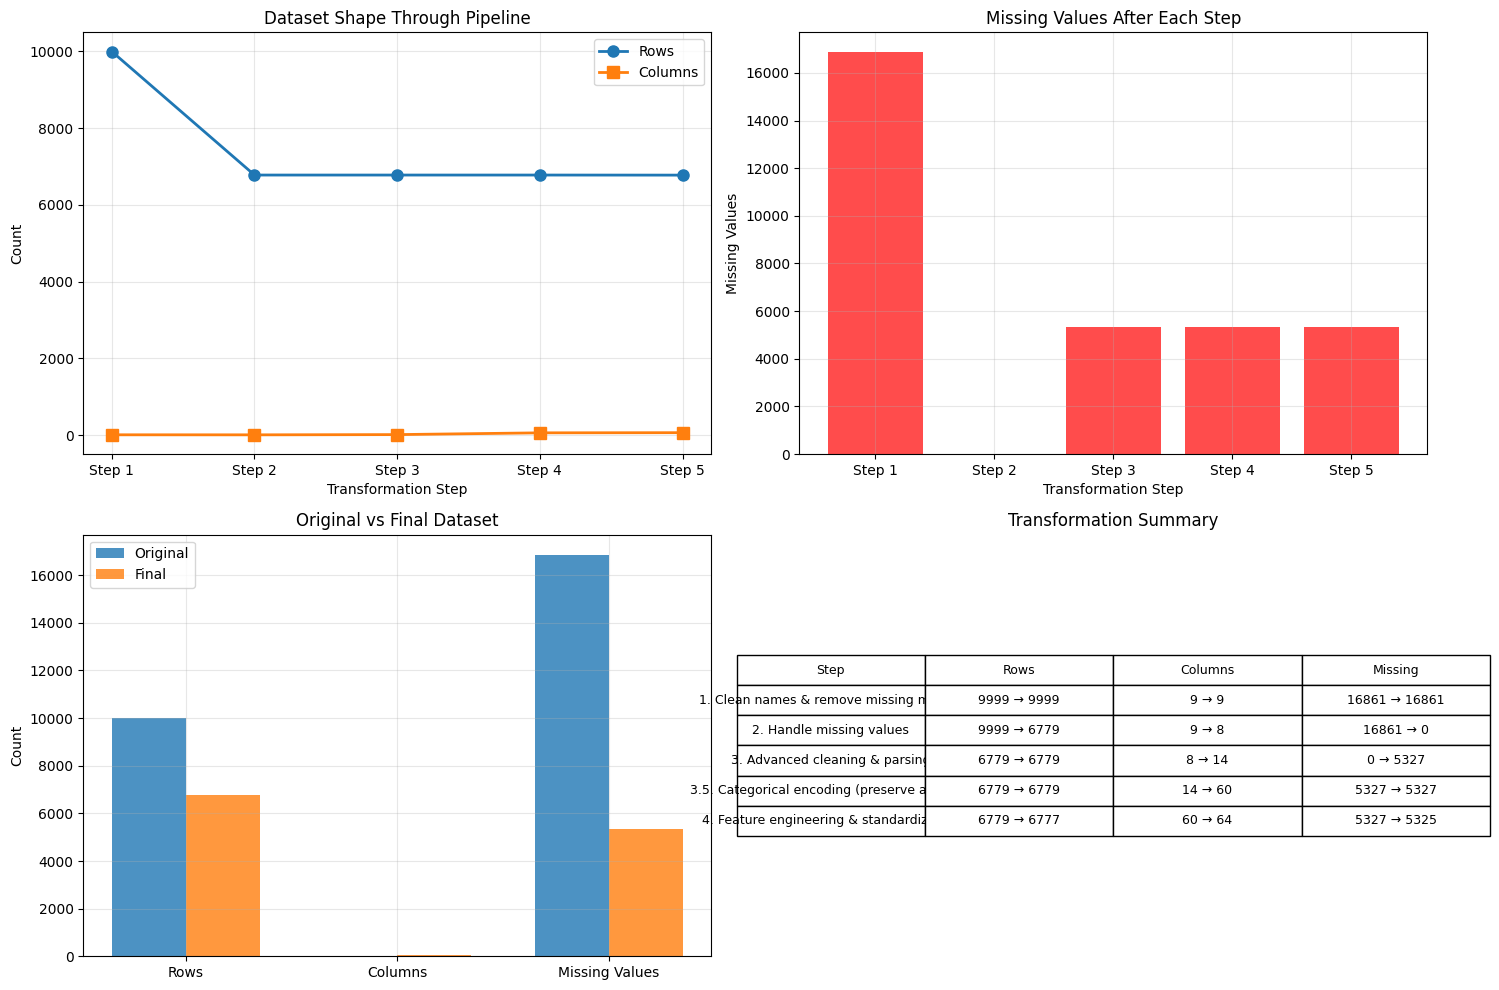


Pipeline completed:
Original: (9999, 9) → Final: (6777, 64)
Missing values: 16861 → 5325
New features created: 55


In [10]:
# Visualize transformation pipeline effects
transformations_df = pd.DataFrame(transformations)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Dataset shape changes
x = range(len(transformations_df))
axes[0,0].plot(x, transformations_df['Rows_After'], 'o-', label='Rows', linewidth=2, markersize=8)
axes[0,0].plot(x, transformations_df['Cols_After'], 's-', label='Columns', linewidth=2, markersize=8)
axes[0,0].set_title('Dataset Shape Through Pipeline')
axes[0,0].set_xlabel('Transformation Step')
axes[0,0].set_ylabel('Count')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
step_labels = [f"Step {i+1}" for i in x]
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(step_labels)

# Missing values reduction
axes[0,1].bar(x, transformations_df['Missing_After'], color='red', alpha=0.7)
axes[0,1].set_title('Missing Values After Each Step')
axes[0,1].set_xlabel('Transformation Step')
axes[0,1].set_ylabel('Missing Values')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(step_labels)
axes[0,1].grid(True, alpha=0.3)

# Before/After comparison
comparison_data = {
    'Metric': ['Rows', 'Columns', 'Missing Values'],
    'Original': [len(raw_df), len(raw_df.columns), raw_df.isnull().sum().sum()],
    'Final': [len(df), len(df.columns), df.isnull().sum().sum()]
}
comp_df = pd.DataFrame(comparison_data)

x_pos = range(len(comp_df))
width = 0.35
axes[1,0].bar([x - width/2 for x in x_pos], comp_df['Original'], width, label='Original', alpha=0.8)
axes[1,0].bar([x + width/2 for x in x_pos], comp_df['Final'], width, label='Final', alpha=0.8)
axes[1,0].set_title('Original vs Final Dataset')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(comp_df['Metric'])
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Transformation summary table
axes[1,1].axis('tight')
axes[1,1].axis('off')
table_data = transformations_df[['Step', 'Rows', 'Columns', 'Missing']]
table = axes[1,1].table(cellText=table_data.values, colLabels=table_data.columns, 
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
axes[1,1].set_title('Transformation Summary')

plt.tight_layout()
plt.show()

print(f"\nPipeline completed:")
print(f"Original: {raw_df.shape} → Final: {df.shape}")
print(f"Missing values: {raw_df.isnull().sum().sum()} → {df.isnull().sum().sum()}")
print(f"New features created: {len(df.columns) - len(raw_df.columns)}")


## LOAD: Save Processed Data


In [11]:
# Save processed data in multiple formats
output_dir = Path('processed_data')
output_dir.mkdir(exist_ok=True)

print("SAVING PROCESSED DATA")
print("=" * 30)

# Save as CSV
csv_path = output_dir / 'movies_processed.csv'
df.to_csv(csv_path, index=False)
csv_size = csv_path.stat().st_size / 1024
print(f"CSV saved: {csv_size:.1f} KB")

# Save as Parquet (more efficient)
parquet_path = output_dir / 'movies_processed.parquet'
df.to_parquet(parquet_path, index=False)
parquet_size = parquet_path.stat().st_size / 1024
print(f"Parquet saved: {parquet_size:.1f} KB")

# Save transformation metadata
metadata = {
    'original_shape': raw_df.shape,
    'final_shape': df.shape,
    'transformations_applied': len(transformations),
    'missing_values_original': raw_df.isnull().sum().sum(),
    'missing_values_final': df.isnull().sum().sum(),
    'compression_ratio': f"{parquet_size/csv_size:.2f}"
}

metadata_df = pd.DataFrame(list(metadata.items()), columns=['Metric', 'Value'])
metadata_path = output_dir / 'transformation_metadata.csv'
metadata_df.to_csv(metadata_path, index=False)

print(f"Metadata saved")
print(f"Compression ratio (Parquet vs CSV): {parquet_size/csv_size:.2f}")

display(metadata_df)


SAVING PROCESSED DATA
CSV saved: 3269.0 KB
Parquet saved: 1446.4 KB
Metadata saved
Compression ratio (Parquet vs CSV): 0.44


,Metric,Value
0,original_shape,"(9999, 9)"
1,final_shape,"(6777, 64)"
2,transformations_applied,5
3,missing_values_original,16861
4,missing_values_final,5325
5,compression_ratio,0.44


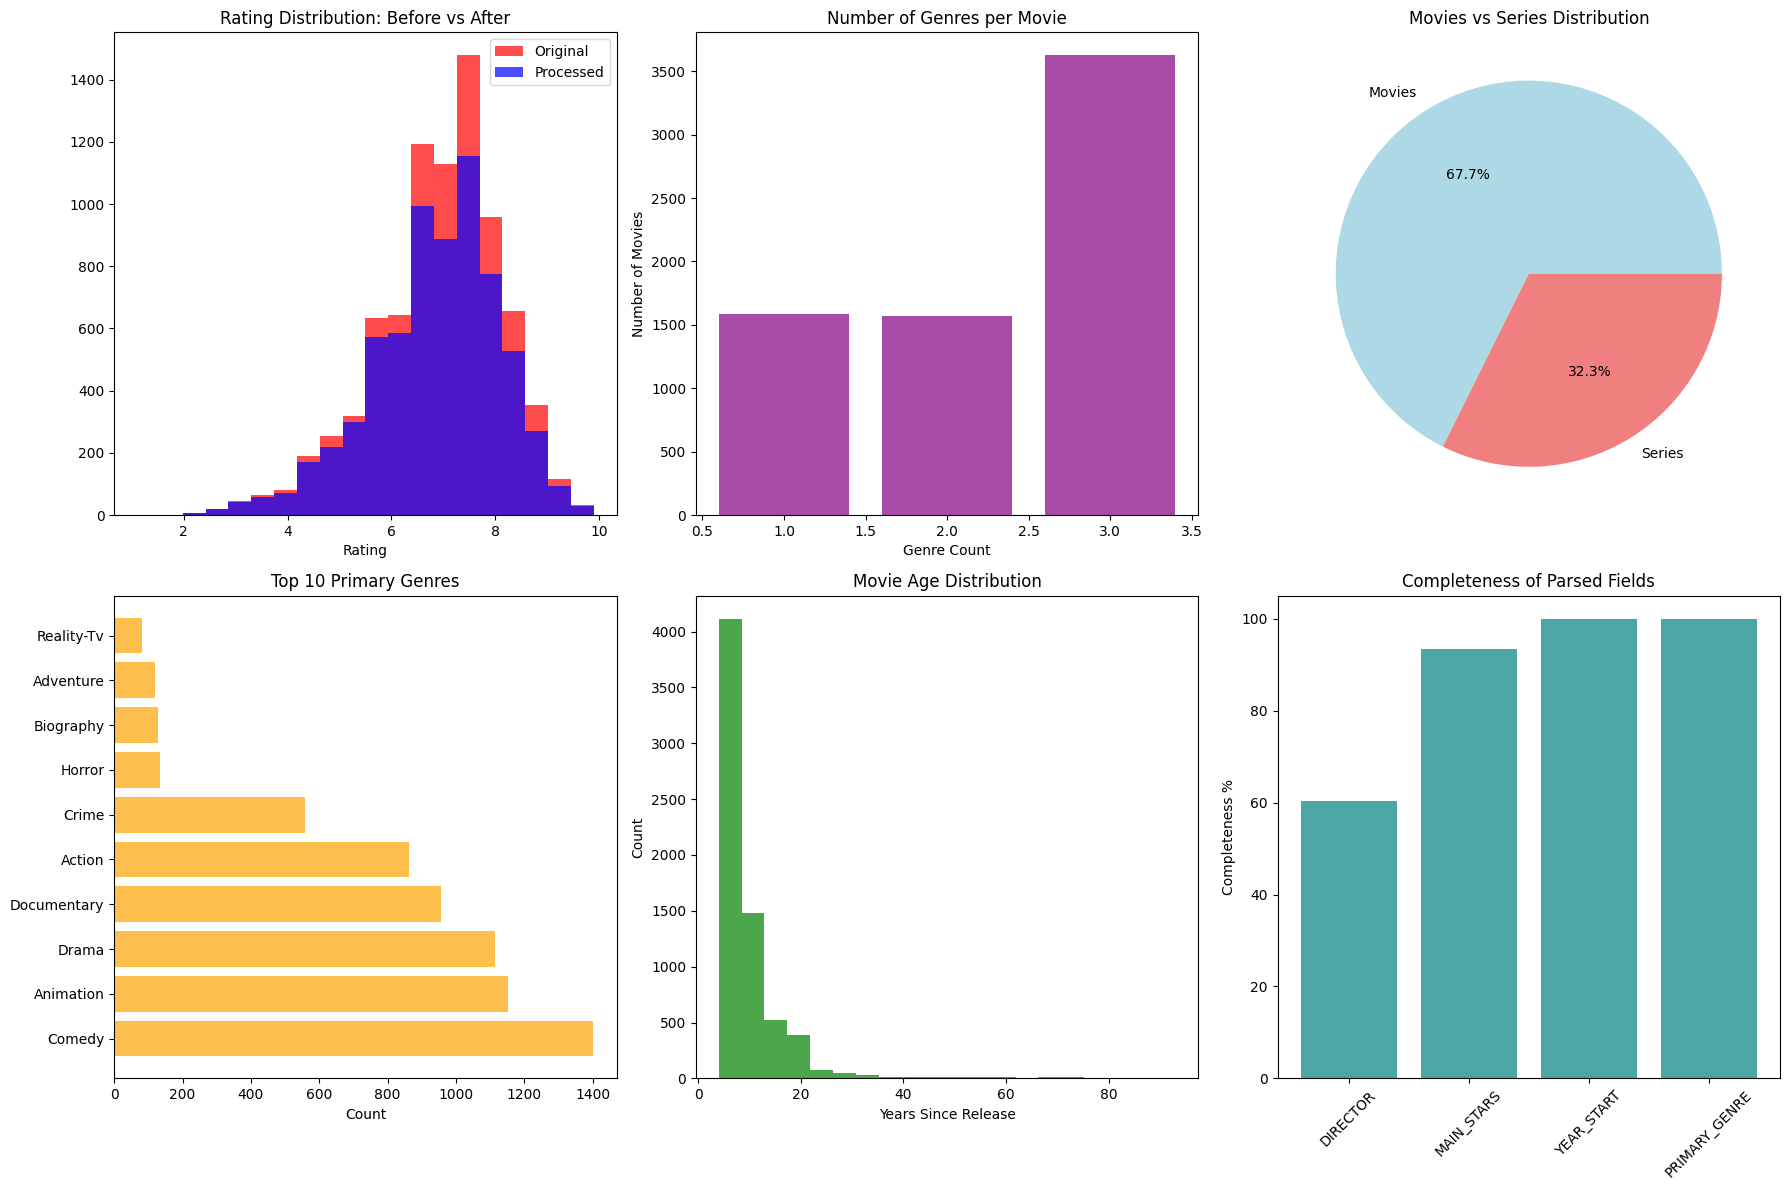

SAMPLE OF PROCESSED DATA WITH NEW FIELDS:
                                MOVIES  YEAR_START  YEAR_END PRIMARY_GENRE  \
0                        Blood Red Sky      2021.0    2021.0        Action   
1  Masters of the Universe: Revelation      2021.0       NaN     Animation   
2                     The Walking Dead      2010.0    2022.0         Drama   
3                       Rick and Morty      2013.0       NaN     Animation   
5                          Outer Banks      2020.0       NaN        Action   

   GENRE_COUNT         DIRECTOR  RATING  IS_SERIES  MOVIE_AGE  
0            3  Peter Thorwarth     6.1       True        4.0  
1            3              NaN     5.0      False        4.0  
2            3              NaN     8.2       True       15.0  
3            3              NaN     9.2      False       12.0  
5            3              NaN     7.6      False        5.0  

CATEGORICAL ENCODING RESULTS:
Genre one-hot columns created: 21
Star encoding columns created: 16
Direct

In [12]:
# Show final dataset characteristics and new features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rating distribution (before vs after)
if 'RATING' in raw_df.columns and 'RATING' in df.columns:
    axes[0,0].hist(raw_df['RATING'].dropna(), bins=20, alpha=0.7, label='Original', color='red')
    axes[0,0].hist(df['RATING'].dropna(), bins=20, alpha=0.7, label='Processed', color='blue')
    axes[0,0].set_title('Rating Distribution: Before vs After')
    axes[0,0].set_xlabel('Rating')
    axes[0,0].legend()

# New feature: Genre count distribution
if 'GENRE_COUNT' in df.columns:
    genre_counts = df['GENRE_COUNT'].value_counts().sort_index()
    axes[0,1].bar(genre_counts.index, genre_counts.values, color='purple', alpha=0.7)
    axes[0,1].set_title('Number of Genres per Movie')
    axes[0,1].set_xlabel('Genre Count')
    axes[0,1].set_ylabel('Number of Movies')

# Series vs Movies
if 'IS_SERIES' in df.columns:
    series_counts = df['IS_SERIES'].value_counts()
    axes[0,2].pie(series_counts.values, labels=['Movies', 'Series'], autopct='%1.1f%%', 
                 colors=['lightblue', 'lightcoral'])
    axes[0,2].set_title('Movies vs Series Distribution')

# Primary genres distribution
if 'PRIMARY_GENRE' in df.columns:
    top_genres = df['PRIMARY_GENRE'].value_counts().head(10)
    axes[1,0].barh(top_genres.index, top_genres.values, color='orange', alpha=0.7)
    axes[1,0].set_title('Top 10 Primary Genres')
    axes[1,0].set_xlabel('Count')

# Movie age distribution
if 'MOVIE_AGE' in df.columns:
    axes[1,1].hist(df['MOVIE_AGE'].dropna(), bins=20, color='green', alpha=0.7)
    axes[1,1].set_title('Movie Age Distribution')
    axes[1,1].set_xlabel('Years Since Release')
    axes[1,1].set_ylabel('Count')

# Data completeness for key parsed fields
new_fields = ['DIRECTOR', 'MAIN_STARS', 'YEAR_START', 'PRIMARY_GENRE']
completeness_new = {}
for field in new_fields:
    if field in df.columns:
        completeness_new[field] = (1 - df[field].isnull().sum() / len(df)) * 100

if completeness_new:
    axes[1,2].bar(completeness_new.keys(), completeness_new.values(), color='teal', alpha=0.7)
    axes[1,2].set_title('Completeness of Parsed Fields')
    axes[1,2].set_ylabel('Completeness %')
    axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display sample of processed data showing new fields
print("SAMPLE OF PROCESSED DATA WITH NEW FIELDS:")
print("=" * 50)
sample_cols = ['MOVIES', 'YEAR_START', 'YEAR_END', 'PRIMARY_GENRE', 'GENRE_COUNT', 
               'DIRECTOR', 'RATING', 'IS_SERIES', 'MOVIE_AGE']
available_cols = [col for col in sample_cols if col in df.columns]
print(df[available_cols].head())

# Show categorical encoding results
print(f"\nCATEGORICAL ENCODING RESULTS:")
print("=" * 40)
genre_cols = [col for col in df.columns if col.startswith('GENRE_')]
star_cols = [col for col in df.columns if col.startswith('STAR_')]
director_cols = [col for col in df.columns if col.startswith('DIRECTOR_')]

print(f"Genre one-hot columns created: {len(genre_cols)}")
print(f"Star encoding columns created: {len(star_cols)}")
print(f"Director encoding columns created: {len(director_cols)}")

# Show example of multi-genre movie
if genre_cols:
    print(f"\nExample multi-genre movie:")
    for idx, row in df.head().iterrows():
        genre_values = [(col.replace('GENRE_', ''), row[col]) for col in genre_cols if row[col] == 1]
        if len(genre_values) > 1:
            print(f"'{row['MOVIES']}': {[g[0] for g in genre_values]}")
            break

print(f"\nETL Pipeline completed successfully!")
print(f"Original dataset: {raw_df.shape}")
print(f"Final dataset: {df.shape}")
print(f"New features created: {len(df.columns) - len(raw_df.columns)}")
print(f"Files saved in: {output_dir.absolute()}")

# Show parsing success rates
print(f"\nPARSING SUCCESS RATES:")
if 'DIRECTOR' in df.columns:
    director_success = (1 - df['DIRECTOR'].isnull().sum() / len(df)) * 100
    print(f"Director extraction: {director_success:.1f}%")
if 'YEAR_START' in df.columns:
    year_success = (1 - df['YEAR_START'].isnull().sum() / len(df)) * 100
    print(f"Year parsing: {year_success:.1f}%")
if 'PRIMARY_GENRE' in df.columns:
    genre_success = (df['PRIMARY_GENRE'] != 'Unknown').sum() / len(df) * 100
    print(f"Genre parsing: {genre_success:.1f}%")


In [13]:
%pip install scikit-learn

/Users/ekirimlioglu/Cursor/Rickg/DSE200-Day1/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# BONUS: Quick Feature Importance Analysis

from sklearn.ensemble import RandomForestRegressor

# Prepare features for analysis
feature_cols = []

# Add numerical features
numerical_features = ['RUNTIME', 'VOTES', 'YEAR_START', 'MOVIE_AGE', 'GENRE_COUNT', 'STAR_COUNT']
for col in numerical_features:
    if col in df.columns:
        feature_cols.append(col)

# Add categorical features (limit to top 15 to avoid overfitting)
categorical_features = [col for col in df.columns if col.startswith(('GENRE_', 'STAR_', 'DIRECTOR_'))]
feature_cols.extend(categorical_features[:15])

# Remove any duplicate columns
feature_cols = list(dict.fromkeys(feature_cols))

# Prepare data for analysis
analysis_df = df[feature_cols + ['RATING', 'MOVIES']].dropna()

# Convert VOTES column to numeric if it's still string
if 'VOTES' in analysis_df.columns:
    analysis_df['VOTES'] = pd.to_numeric(analysis_df['VOTES'].astype(str).str.replace(',', ''), errors='coerce')

# Ensure we have valid feature columns that exist in the dataframe
valid_feature_cols = [col for col in feature_cols if col in analysis_df.columns]

X = analysis_df[valid_feature_cols]
y = analysis_df['RATING']

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
    'Feature': valid_feature_cols,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(f"Analysis based on {len(analysis_df)} movies with complete data")
print(f"Model R² Score: {rf.score(X, y):.3f}")
print("\nTOP 10 MOST IMPORTANT FEATURES FOR PREDICTING RATING:")
print("-" * 55)

for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
    feature_name = row['Feature']
    importance = row['Importance']
    
    if feature_name.startswith('GENRE_'):
        display_name = f"Genre: {feature_name.replace('GENRE_', '').replace('_', ' ').title()}"
    elif feature_name.startswith('STAR_'):
        display_name = f"Star: {feature_name.replace('STAR_', '').replace('_', ' ').title()}"
    elif feature_name.startswith('DIRECTOR_'):
        display_name = f"Director: {feature_name.replace('DIRECTOR_', '').replace('_', ' ').title()}"
    else:
        display_name = feature_name.replace('_', ' ').title()
    
    print(f"{i:2d}. {display_name:<35} {importance:.3f}")

top_feature = feature_importance_df.iloc[0]
print(f"\nINSIGHT: '{top_feature['Feature']}' is the strongest predictor of movie ratings!")



Analysis based on 6777 movies with complete data
Model R² Score: 0.674

TOP 10 MOST IMPORTANT FEATURES FOR PREDICTING RATING:
-------------------------------------------------------
 1. Runtime                             0.414
 2. Votes                               0.219
 3. Genre: Documentary                  0.069
 4. Movie Age                           0.045
 5. Year Start                          0.044
 6. Genre: Drama                        0.038
 7. Genre: Horror                       0.035
 8. Star: Count                         0.023
 9. Genre: Action                       0.018
10. Genre: Count                        0.015

INSIGHT: 'RUNTIME' is the strongest predictor of movie ratings!


In [15]:
%pip install torch
%pip install plotly

/Users/ekirimlioglu/Cursor/Rickg/DSE200-Day1/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.
/Users/ekirimlioglu/Cursor/Rickg/DSE200-Day1/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


Training neural network and collecting trajectory...
Epoch 0: Loss = 45.4260
Epoch 20: Loss = 3.6412
Epoch 40: Loss = 1.4110
Epoch 60: Loss = 1.0729
Epoch 80: Loss = 0.9956

Training complete! Final loss: 0.9700


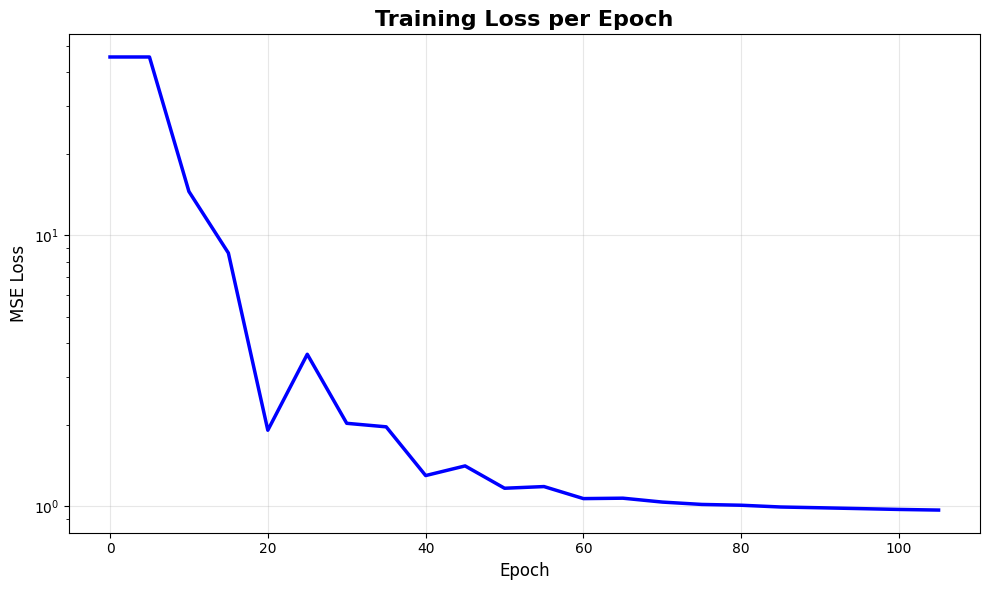


Generating interactive 3D loss landscape...
Computing loss surface...



Optimization Summary:
Initial Loss: 45.4260
Final Loss: 0.9700
Improvement: 97.9%
Number of trajectory points: 22

Interactive controls:
- Rotate: Click and drag
- Zoom: Scroll or pinch
- Pan: Shift + click and drag
- Reset: Double click
- Hover over trajectory to see loss values


In [ ]:
# bonus number 2 neural nets
# Simple Neural Network for Rating Prediction
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values.reshape(-1, 1))

# Define neural network
class RatingPredictor(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Function to get model parameters as vector
def get_params_vector(model):
    params = []
    for p in model.parameters():
        params.extend(p.data.cpu().numpy().flatten())
    return np.array(params)

# Function to set model parameters from vector
def set_params_from_vector(model, params_vector):
    idx = 0
    for p in model.parameters():
        param_length = p.numel()
        p.data = torch.from_numpy(params_vector[idx:idx+param_length]).float().reshape(p.shape)
        idx += param_length

# Function to evaluate loss at given parameters
def evaluate_loss(params_vector, model_template, X, y):
    model = RatingPredictor(X.shape[1])
    set_params_from_vector(model, params_vector)
    model.eval()
    with torch.no_grad():
        predictions = model(X)
        loss = nn.MSELoss()(predictions, y)
    return loss.item()

# Train model and collect trajectory
print("Training neural network and collecting trajectory...")
model = RatingPredictor(X_train_scaled.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Store trajectory
trajectory_params = []
trajectory_losses = []

# Initial parameters
initial_params = get_params_vector(model)
trajectory_params.append(initial_params.copy())
trajectory_losses.append(evaluate_loss(initial_params, model, X_train_tensor, y_train_tensor))

# Train for 100 epochs
epochs = 100
for epoch in range(epochs):
    predictions = model(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Save trajectory every 5 epochs
    if epoch % 5 == 0:
        current_params = get_params_vector(model)
        trajectory_params.append(current_params.copy())
        trajectory_losses.append(loss.item())
        
        if epoch % 20 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Final parameters
final_params = get_params_vector(model)
trajectory_params.append(final_params.copy())
trajectory_losses.append(evaluate_loss(final_params, model, X_train_tensor, y_train_tensor))

print(f"\nTraining complete! Final loss: {trajectory_losses[-1]:.4f}")

# Plot loss per epoch (simple 2D plot)
plt.figure(figsize=(10, 6))
plt.plot(range(0, len(trajectory_losses)*5, 5), trajectory_losses, 'b-', linewidth=2.5)
plt.title('Training Loss per Epoch', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create 3D loss landscape visualization
print("\nGenerating interactive 3D loss landscape...")


trajectory_params_array = np.array(trajectory_params)
pca = PCA(n_components=2)
trajectory_2d = pca.fit_transform(trajectory_params_array)

# Create grid around trajectory
margin = 2.0
x_min, x_max = trajectory_2d[:, 0].min() - margin, trajectory_2d[:, 0].max() + margin
y_min, y_max = trajectory_2d[:, 1].min() - margin, trajectory_2d[:, 1].max() + margin

# Create dense grid
grid_size = 50
x_range = np.linspace(x_min, x_max, grid_size)
y_range = np.linspace(y_min, y_max, grid_size)
X_grid, Y_grid = np.meshgrid(x_range, y_range)

# Compute loss surface
print("Computing loss surface...")
Z_grid = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        # Get 2D point
        point_2d = np.array([X_grid[i, j], Y_grid[i, j]])
        
        # Find closest trajectory point for interpolation
        distances = np.sum((trajectory_2d - point_2d)**2, axis=1)
        closest_idx = np.argmin(distances)
        
        # Interpolate in parameter space
        if closest_idx == 0:
            direction = trajectory_params[1] - trajectory_params[0]
        elif closest_idx == len(trajectory_params) - 1:
            direction = trajectory_params[-1] - trajectory_params[-2]
        else:
            direction = trajectory_params[closest_idx + 1] - trajectory_params[closest_idx - 1]
        
        # Project displacement onto parameter space
        displacement_2d = point_2d - trajectory_2d[closest_idx]
        
        # Create perturbation in parameter space
        perturbation = np.zeros_like(trajectory_params[0])
        if len(pca.components_) >= 2:
            perturbation += displacement_2d[0] * pca.components_[0] * np.std(trajectory_params_array[:, 0])
            perturbation += displacement_2d[1] * pca.components_[1] * np.std(trajectory_params_array[:, 1])
        
        # Evaluate loss at perturbed point
        perturbed_params = trajectory_params[closest_idx] + perturbation * 0.5
        Z_grid[i, j] = evaluate_loss(perturbed_params, model, X_train_tensor, y_train_tensor)

# Create interactive 3D plot
fig = go.Figure()

# Add loss surface
fig.add_trace(go.Surface(
    x=x_range,
    y=y_range,
    z=Z_grid,
    colorscale='Viridis',
    opacity=0.8,
    showscale=True,
    colorbar=dict(
        title="Loss",
        tickmode="linear",
        tick0=0,
        dtick=0.5
    ),
    contours=dict(
        z=dict(
            show=True,
            usecolormap=True,
            highlightcolor="limegreen",
            project=dict(z=True)
        )
    ),
    name='Loss Surface'
))

# Add optimization trajectory
fig.add_trace(go.Scatter3d(
    x=trajectory_2d[:, 0],
    y=trajectory_2d[:, 1],
    z=trajectory_losses,
    mode='lines+markers',
    name='Optimization Path',
    line=dict(
        color='red',
        width=10
    ),
    marker=dict(
        size=8,
        color='red',
        symbol='circle'
    )
))

# Add start point
fig.add_trace(go.Scatter3d(
    x=[trajectory_2d[0, 0]],
    y=[trajectory_2d[0, 1]],
    z=[trajectory_losses[0]],
    mode='markers',
    name='Start',
    marker=dict(
        size=20,
        color='green',
        symbol='diamond'
    )
))

# Add end point
fig.add_trace(go.Scatter3d(
    x=[trajectory_2d[-1, 0]],
    y=[trajectory_2d[-1, 1]],
    z=[trajectory_losses[-1]],
    mode='markers',
    name='End',
    marker=dict(
        size=20,
        color='blue',
        symbol='square'
    )
))

# Update layout
fig.update_layout(
    title=dict(
        text='Interactive 3D Loss Landscape with Optimization Trajectory',
        font=dict(size=24),
        x=0.5,
        xanchor='center'
    ),
    scene=dict(
        xaxis=dict(
            title='First Principal Component',
            gridcolor='rgb(255, 255, 255)',
            gridwidth=2
        ),
        yaxis=dict(
            title='Second Principal Component',
            gridcolor='rgb(255, 255, 255)',
            gridwidth=2
        ),
        zaxis=dict(
            title='Loss',
            gridcolor='rgb(255, 255, 255)',
            gridwidth=2
        ),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.2),
            center=dict(x=0, y=0, z=0)
        ),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.7)
    ),
    width=1400,
    height=1000,
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.9)',
        bordercolor='black',
        borderwidth=2,
        font=dict(size=14)
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

# Print summary statistics
print("\nOptimization Summary:")
print(f"Initial Loss: {trajectory_losses[0]:.4f}")
print(f"Final Loss: {trajectory_losses[-1]:.4f}")
print(f"Improvement: {(1 - trajectory_losses[-1]/trajectory_losses[0])*100:.1f}%")
print(f"Number of trajectory points: {len(trajectory_losses)}")

print("\nInteractive controls:")
print("- Rotate: Click and drag")
print("- Zoom: Scroll or pinch")
print("- Pan: Shift + click and drag")
print("- Reset: Double click")
print("- Hover over trajectory to see loss values")
